# ECON 616 Macroeconometrics - HW 5

Professor Ed Herbst <br> Steven Zheng <br> sz293@georgetown.edu <br> December 4, 2017

## Number 1

#### Download data from Gertler and Karadi (2015), drop all observations with NA and where series is uniformly zero. Descriptive statistics and correlation table.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='darkgrid')
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler
import math
import statsmodels.api as sm

/Users/stevenzheng/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data = pd.read_csv('factor_data.csv')
data = data.loc[~(data[['mp1_tc','ff4_tc','ed2_tc','ed3_tc','ed4_tc']]==0).all(axis=1)].dropna().reset_index(drop=True)
data.tail()

,year,month,mp1_tc,ff4_tc,ed2_tc,ed3_tc,ed4_tc
262,2012,1,0.000539,0.000000,0.000484,-0.001774,-0.004032
263,2012,2,-0.003871,0.000000,-0.011613,-0.019355,-0.027097
264,2012,3,0.000000,0.000000,0.003065,0.009193,0.012258
265,2012,4,0.000000,0.000000,0.001935,0.005806,0.007742
266,2012,6,0.002754,0.003667,0.007333,0.007333,0.007333


In [3]:
data.describe()

,year,month,mp1_tc,ff4_tc,ed2_tc,ed3_tc,ed4_tc
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,2000.715356,6.434457,-0.015501,-0.013600,-0.012401,-0.011723,-0.011910
std,6.446532,3.471475,0.058753,0.048675,0.049646,0.051313,0.050781
min,1990.000000,1.000000,-0.422587,-0.290322,-0.255366,-0.275290,-0.251984
25%,1995.000000,3.000000,-0.015782,-0.010984,-0.018226,-0.022903,-0.028387
50%,2001.000000,6.000000,0.000000,-0.001129,-0.001500,-0.001000,-0.003237
75%,2006.000000,9.000000,0.004511,0.003688,0.008479,0.009113,0.009540
max,2012.000000,12.000000,0.145830,0.092193,0.133929,0.161129,0.213387


In [4]:
data[['mp1_tc','ff4_tc','ed2_tc','ed3_tc','ed4_tc']].corr().round(2)

,mp1_tc,ff4_tc,ed2_tc,ed3_tc,ed4_tc
mp1_tc,1.00,0.81,0.74,0.64,0.54
ff4_tc,0.81,1.00,0.81,0.74,0.65
ed2_tc,0.74,0.81,1.00,0.96,0.90
ed3_tc,0.64,0.74,0.96,1.00,0.97
ed4_tc,0.54,0.65,0.90,0.97,1.00


## Number 2

#### We will apply principal components analysis (without using a built-in package). First center and normalize each column so that each column has zero mean and unit variance.

In [5]:
X = data[['mp1_tc','ff4_tc','ed2_tc','ed3_tc','ed4_tc']]
X = pd.DataFrame(StandardScaler().fit_transform(X))
X.columns = ['mp1_tc','ff4_tc','ed2_tc','ed3_tc','ed4_tc']
X.describe().round(2)

,mp1_tc,ff4_tc,ed2_tc,ed3_tc,ed4_tc
count,267.00,267.00,267.00,267.00,267.00
mean,-0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00
min,-6.94,-5.70,-4.90,-5.15,-4.74
25%,-0.00,0.05,-0.12,-0.22,-0.33
50%,0.26,0.26,0.22,0.21,0.17
75%,0.34,0.36,0.42,0.41,0.42
max,2.75,2.18,2.95,3.37,4.44


#### And the eigenpairs of $X'X$ are

In [6]:
XTX = np.dot(X.T,X)

eigenvalues, eigenvectors = np.linalg.eigh(XTX)
eigenvalues = np.flip(eigenvalues,0) #Python gave them in smallest to largest so we flip them
eigenvectors = np.flip(eigenvectors,1)

print('The eigenvalues are\n %s\nand the eigenvectors are \n %s' % (eigenvalues,eigenvectors))

The eigenvalues are
 [ 1100.53709875   168.87223008    46.53465745    15.69727248     3.35874125]
and the eigenvectors are 
 [[-0.40066132 -0.65349036 -0.61717299 -0.17629405 -0.0209464 ]
 [-0.4339722  -0.42992623  0.77831614 -0.14508527  0.00241074]
 [-0.48084705  0.13260004 -0.05671399  0.74831789  0.43359797]
 [-0.47185891  0.33973923 -0.05442712  0.09930073 -0.80566958]
 [-0.44415528  0.50508243 -0.08451447 -0.61484174  0.40304437]]


 #### The first three principal components explain 82.44% + 12.65% + 3.49% = 98.58% of the variation and follow the levels, steepness and curvature of Litterman and Scheinkman (1991).

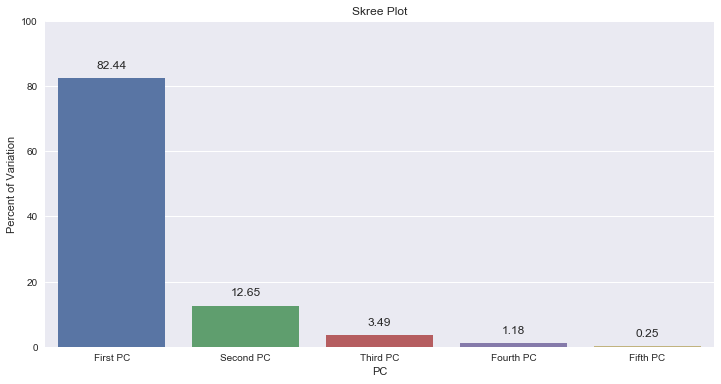

In [7]:
eigenvalues_percent = eigenvalues/sum(eigenvalues)*100

plt.figure(figsize=(12,6))

PC_labels = ['First PC','Second PC','Third PC','Fourth PC','Fifth PC']
ax = sns.barplot(PC_labels,eigenvalues_percent)

for i in range(len(eigenvalues_percent)):
    variation = eigenvalues_percent[i]
    height = ax.patches[i].get_height()
    ax.text(ax.patches[i].get_x()+ax.patches[i].get_width()/2.,
            height+3, 
            '{:1.2f}'.format(eigenvalues_percent[i]),
            ha='center')

plt.xlabel('PC')
plt.ylabel('Percent of Variation')
plt.ylim(0,100)
plt.title('Skree Plot')
plt.show()

In [8]:
eigenvectors = pd.DataFrame(eigenvectors)
#eigenvectors[0] = -1*eigenvectors[0] make it positive for intepretation and visualization

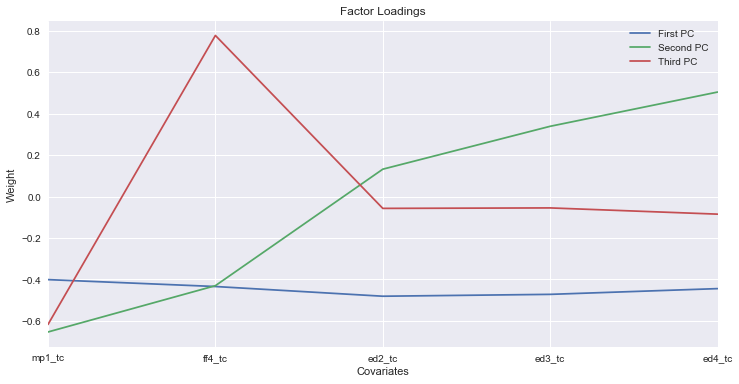

In [9]:
ax = eigenvectors[[0,1,2]].plot(figsize=(12,6))
ax.set_xticks(range(len(X.columns)))
ax.set_xticklabels(X.columns)

lines, labels = ax.get_legend_handles_labels()
labels = ['First PC', 'Second PC', 'Third PC']
ax.legend(lines, labels, loc='best')

plt.title('Factor Loadings')
plt.xlabel('Covariates')
plt.ylabel('Weight')
plt.show()

#### And then plotting the first three principal components over time.

In [10]:
principal_components = pd.DataFrame(np.dot(X,eigenvectors[0]))
principal_components.columns = ['PC 1']
principal_components['PC 2'] = pd.DataFrame(np.dot(X,eigenvectors[1]))
principal_components['PC 3'] = pd.DataFrame(np.dot(X,eigenvectors[2]))
#principal_components['PC 4'] = pd.DataFrame(np.dot(X,eigenvectors[3]))
#principal_components['PC 5'] = pd.DataFrame(np.dot(X,eigenvectors[4]))
principal_components.tail()

,PC 1,PC 2,PC 3
262,-0.516792,-0.120128,0.010617
263,-0.005194,-0.449805,0.128018
264,-0.781944,0.127873,-0.025479
265,-0.700208,0.057381,-0.013057
266,-0.814640,0.014749,0.009583


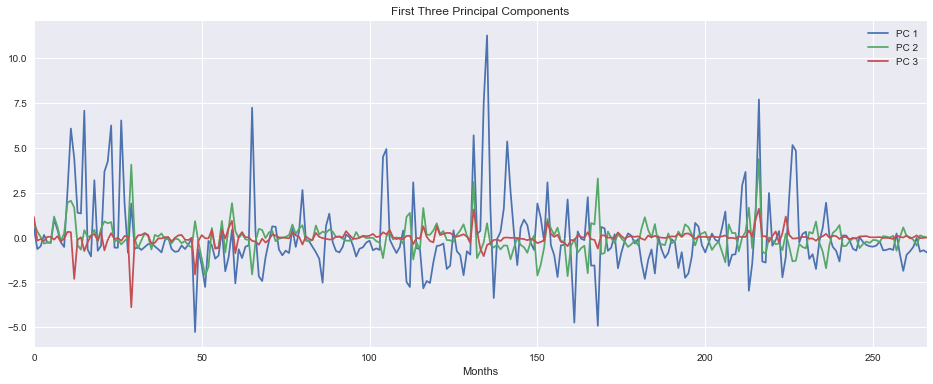

In [11]:
ax = principal_components.plot(figsize=(16,6))
lines, labels = ax.get_legend_handles_labels()
labels = principal_components.columns
ax.legend(lines, labels, loc='best')
plt.title('First Three Principal Components')
plt.xlabel('Months')
plt.show()

#### And the regression of $mp1$ on the first three principal components has great fit!

In [12]:
reg1 = sm.OLS(endog=X['mp1_tc'], exog=principal_components, missing='drop')
results = reg1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 mp1_tc   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.793e+04
Date:                Thu, 30 Nov 2017   Prob (F-statistic):               0.00
Time:                        19:28:30   Log-Likelihood:                 462.45
No. Observations:                 267   AIC:                            -918.9
Df Residuals:                     264   BIC:                            -908.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PC 1          -0.4007      0.001   -308.729      0.0

## Number 3

#### Now we follow Gurkaynak, Sack and Swanson (2004) and use the first two principal components as the two factors $F_1$ and $F_2$. Let $$F=[F_1 \ F_1]$$ so that $F_1$ and $F_2$ are in $\mathbb{R}^{267}$ and form the columns of $F$ so $F$ is $267\times 2$. 

In [13]:
F = principal_components[['PC 1', 'PC 2']].copy()
F.columns = ['F1','F2']
F.tail()

,F1,F2
262,-0.516792,-0.120128
263,-0.005194,-0.449805
264,-0.781944,0.127873
265,-0.700208,0.057381
266,-0.814640,0.014749


#### Then first we normalize each of them to have unit variance.

In [14]:
F = pd.DataFrame(StandardScaler().fit_transform(F))
F.columns = ['F1', 'F2']
F.describe().round(2)

,F1,F2
count,267.00,267.00
mean,0.00,-0.00
std,1.00,1.00
min,-2.59,-2.70
25%,-0.42,-0.47
50%,-0.22,-0.07
75%,0.16,0.35
max,5.55,5.52


#### As mentioned in GSS section 3.2, the two principal components are correlated with $mp_1$, the surpises in the current fed funds target.

In [15]:
pd.concat([X['mp1_tc'], F], axis=1).corr().round(2)

,mp1_tc,F1,F2
mp1_tc,1.00,-0.81,-0.52
F1,-0.81,1.00,0.00
F2,-0.52,0.00,1.00


#### So to structurize the two factors, we rotate them by forming $267\times 2$ matrix Z $$ Z=[Z_1 \ Z_2] = FU$$ where $Z_1$ and $Z_2$ correspond to the rotated factors, and where $U$ is a $2\times 2$ solved by:


In [16]:
gamma1 = eigenvectors[0][0]
gamma2 = eigenvectors[1][0]

#alpha1 = -1.0*gamma1/(math.sqrt(math.pow(gamma1,2.0) + math.pow(gamma2,2.0)))
#alpha2 = math.sqrt(1-(math.pow(alpha1,2.0)))

#beta1 = -1.0*alpha2/(math.sqrt(math.pow(alpha1,2.0) + math.pow(alpha2,2.0)))
#beta2 = math.sqrt(1-(math.pow(beta1,2.0)))


alpha1 = 1.0*gamma1/math.sqrt(gamma1**2.0 + gamma2**2.0)
alpha2 = 1.0*gamma2/math.sqrt(gamma1**2.0 + gamma2**2.0)

beta1 = 1.0*math.sqrt(gamma2**2.0 / (gamma1**2.0 + gamma2**2.0))
beta2 = -1.0*gamma1*math.sqrt(gamma2**2/(gamma1**2.0 + gamma2**2.0))/gamma2

U = np.array([[alpha1, beta1],[alpha2, beta2]])
print('U = %s'%U)

U = [[-0.52269005  0.85252279]
 [-0.85252279 -0.52269005]]


#### Create new dataframe with rotated factors $Z_1$ and $Z_2$, and then check the four identification constraints.

In [17]:
Z = pd.DataFrame(np.dot(F,U))
Z.columns=['Z1','Z2']
Z.cov().round(2)

,Z1,Z2
Z1,1.0,-0.0
Z2,-0.0,1.0


#### The columns of $U$ have unit length
$$\begin{align*}
\sqrt{\alpha_1 ^2 + \alpha_2^2} = 1
\\\sqrt{\beta_1 ^2 + \beta_2^2} = 1
\end{align*}$$

In [18]:
print(np.linalg.norm(U[:,0]))
print(np.linalg.norm(U[:,1]))

1.0
1.0


#### $Z_1$ and $Z_2$ have unit variance.

In [19]:
Z.describe().round(2)

,Z1,Z2
count,267.00,267.00
mean,0.00,0.00
std,1.00,1.00
min,-6.69,-4.23
25%,-0.14,-0.42
50%,0.19,-0.13
75%,0.43,0.31
max,2.97,4.39


#### $Z_1$ and $Z_2$ are orthogonal to each other

$$ \text{E} (Z_1 Z_2) = \alpha_1 \beta_1 + \alpha_2\beta_2=0$$

In [20]:
print((alpha1*beta1 + alpha2*beta2).round(2))

0.0


In [21]:
pd.concat([X['mp1_tc'], Z], axis=1).corr().round(2)

,mp1_tc,Z1,Z2
mp1_tc,1.00,0.87,-0.42
Z1,0.87,1.00,-0.00
Z2,-0.42,-0.00,1.00


#### And $Z_2$ does not influence the current policy suprise $mp1$ $$\gamma_2 \alpha_1 - \gamma_1 \alpha_2 =0.$$

In [22]:
print(gamma2*alpha1-gamma1*alpha2)

0.0


#### Rescale $Z_1$ and $Z_2$ so that $Z_1$ moves the current policy surprise $mp1$ one-for-one and $Z_2$ has the same magnitude effect on the year-ahead eurodollar futures rate as $Z_1$ has on that rate.

#### Unscaled regression

In [357]:
reg1 = sm.OLS(endog=X['mp1_tc'], exog=rotated_factors, missing='drop')
results = reg1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 mp1_tc   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     1810.
Date:                Mon, 27 Nov 2017   Prob (F-statistic):          3.11e-155
Time:                        15:50:24   Log-Likelihood:                -20.405
No. Observations:                 267   AIC:                             44.81
Df Residuals:                     265   BIC:                             51.98
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Z1            -0.8682      0.016    -54.114      0.0

#### Scaled regression

In [519]:
rotated_factors_scaled = pd.DataFrame()
rotated_factors_scaled['Target Factor'] = rotated_factors['Z1'].copy()/-1.151753
#rotated_factors_scaled['Path Factor'] = rotated_factors['Z2'].copy() # no change
#rotated_factors_scaled['Path Factor'] = rotated_factors['Z2'].copy()/0.151673 #make it same as ed4_tc
rotated_factors_scaled['Path Factor'] = rotated_factors['Z2'].copy()/2.3707
rotated_factors_scaled['const'] = 1
rotated_factors_scaled.tail()

,Target Factor,Path Factor,const
262,0.227325,0.058234,1
263,0.419808,-0.123781,1
264,0.055774,0.173953,1
265,0.103113,0.139933,1
266,0.168370,0.148383,1


In [520]:
reg2 = sm.OLS(endog=X['mp1_tc'], exog=rotated_factors_scaled, missing='drop')
results2 = reg2.fit()
print(results2.summary())

reg3 = sm.OLS(endog=X['ed4_tc'], exog=rotated_factors_scaled, missing='drop')
results3 = reg3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                 mp1_tc   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     1803.
Date:                Mon, 27 Nov 2017   Prob (F-statistic):          1.19e-154
Time:                        17:37:45   Log-Likelihood:                -20.405
No. Observations:                 267   AIC:                             46.81
Df Residuals:                     264   BIC:                             57.57
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Target Factor     1.0000      0.019     54.012

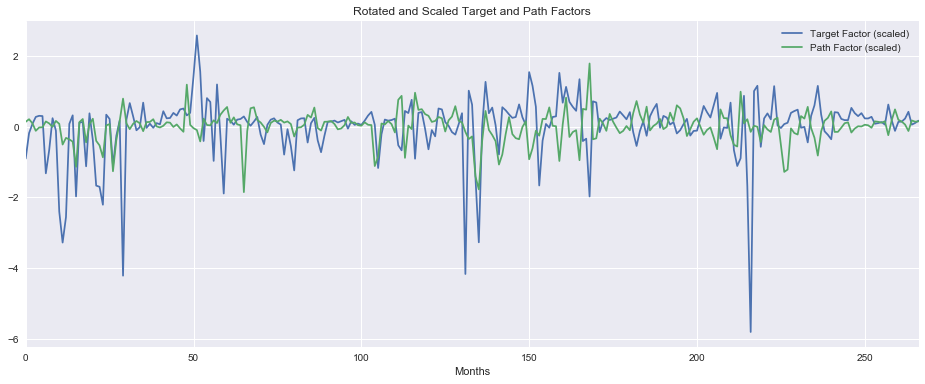

In [521]:
ax = rotated_factors_scaled[['Target Factor','Path Factor']].plot(figsize=(16,6))
#ax=pd.concat([X['mp1_tc'], rotated_factors_scaled[['Z1','Z2']]], axis=1).plot(figsize=(16,6))
lines, labels = ax.get_legend_handles_labels()
#labels = ['mp1','Z1 (scaled)', 'Z2 (scaled)']
labels = ['Target Factor (scaled)', 'Path Factor (scaled)']
ax.legend(lines, labels, loc='best')
plt.title('Rotated and Scaled Target and Path Factors')
plt.xlabel('Months')
plt.show()

#### We have data $X$ and let $V$ be the matrix where it's two columns are the first two eigenvectors of $X'X$. Then for the rotated factors $Z$ and first two principal components $F=XV$, we have that

$$Z=FV=XVU$$ 

and the shifted eigenvectors are $VU$.

In [522]:
U = np.array([[alpha1, beta1],[alpha2, beta2]])
U

array([[ 0.52269005, -0.85252279],
       [ 0.85252279,  0.52269005]])

In [523]:
factor_loadings[[0,1]]

,0,1
0,-0.400661,-0.653490
1,-0.433972,-0.429926
2,-0.480847,0.132600
3,-0.471859,0.339739
4,-0.444155,0.505082


In [524]:
scaled_shifted_eigenvectors = pd.DataFrame(np.dot(factor_loadings[[0,1]],U))
scaled_shifted_eigenvectors

,0,1
0,-0.766537,-1.389086e-17
1,-0.593355,1.452530e-01
2,-0.138289,4.792418e-01
3,0.042999,5.798488e-01
4,0.198439,6.426541e-01


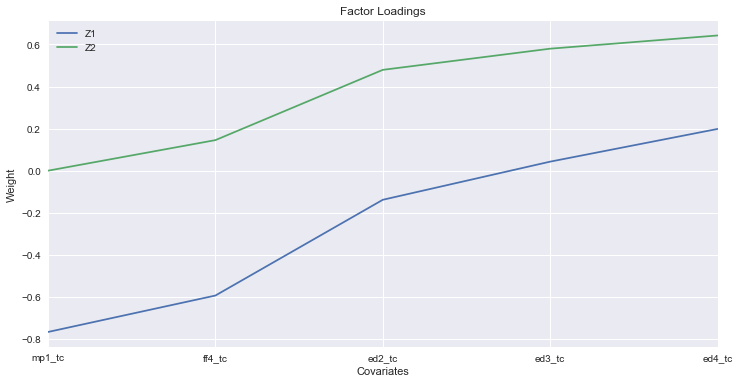

In [525]:
ax = scaled_shifted_eigenvectors.plot(figsize=(12,6))
ax.set_xticks(range(len(X.columns)))
ax.set_xticklabels(X.columns)

lines, labels = ax.get_legend_handles_labels()
labels = ['Z1', 'Z2']
ax.legend(lines, labels, loc='best')

plt.title('Factor Loadings')
plt.xlabel('Covariates')
plt.ylabel('Weight')
plt.show()

#### Regression with just Target factor

In [528]:
reg3 = sm.OLS(endog=X['mp1_tc'], exog=rotated_factors_scaled[['const','Target Factor']], missing='drop')
results3 = reg3.fit()
print(results3.summary())

reg3 = sm.OLS(endog=X['ff4_tc'], exog=rotated_factors_scaled[['const','Target Factor']], missing='drop')
results3 = reg3.fit()
print(results3.summary())

reg3 = sm.OLS(endog=X['ed2_tc'], exog=rotated_factors_scaled[['const','Target Factor']], missing='drop')
results3 = reg3.fit()
print(results3.summary())

reg3 = sm.OLS(endog=X['ed3_tc'], exog=rotated_factors_scaled[['const','Target Factor']], missing='drop')
results3 = reg3.fit()
print(results3.summary())

reg3 = sm.OLS(endog=X['ed4_tc'], exog=rotated_factors_scaled[['const','Target Factor']], missing='drop')
results3 = reg3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                 mp1_tc   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     811.6
Date:                Mon, 27 Nov 2017   Prob (F-statistic):           1.22e-82
Time:                        17:38:38   Log-Likelihood:                -191.72
No. Observations:                 267   AIC:                             387.4
Df Residuals:                     265   BIC:                             394.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.654e-17      0.030  -1.53e-15

#### Regression with Target and Path factors.

In [529]:
reg3 = sm.OLS(endog=X['mp1_tc'], exog=rotated_factors_scaled, missing='drop')
results3 = reg3.fit()
print(results3.summary())

reg3 = sm.OLS(endog=X['ff4_tc'], exog=rotated_factors_scaled, missing='drop')
results3 = reg3.fit()
print(results3.summary())

reg3 = sm.OLS(endog=X['ed2_tc'], exog=rotated_factors_scaled, missing='drop')
results3 = reg3.fit()
print(results3.summary())

reg3 = sm.OLS(endog=X['ed3_tc'], exog=rotated_factors_scaled, missing='drop')
results3 = reg3.fit()
print(results3.summary())

reg3 = sm.OLS(endog=X['ed4_tc'], exog=rotated_factors_scaled, missing='drop')
results3 = reg3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                 mp1_tc   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     1803.
Date:                Mon, 27 Nov 2017   Prob (F-statistic):          1.19e-154
Time:                        17:38:43   Log-Likelihood:                -20.405
No. Observations:                 267   AIC:                             46.81
Df Residuals:                     264   BIC:                             57.57
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Target Factor     1.0000      0.019     54.012

Change in Asset Prices | Constant | Target Factor | Path Factor | R-squared (both factors)|R-squared (Target facto ronly)|
------------- |:-------------:| -----:| -----:| -----:|
Current Fed Funds   | -1.203e-16  | 100.0000|6.3980|0.932
3M ahead Fed Funds  | -6.672e-17  |86.6135  |8.6820 |0.893
2Q ahead Eurodollar | -2.541e-16  |48.4156  |13.4592|0.964
3Q ahead Eurodollar | -1.671e-16  | 31.1418 |14.5292|0.991
4Q ahead Eurodollar | -2.213e-16  | 14.8444 |14.8444|0.974